In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
os.chdir("../../../")
curr_dir = os.getcwd()
curr_dir

'/lustre/eaglefs/projects/robustmicrob/jlaw/projects/prot_stability_engineering'

In [3]:
# load the substrates
data_dir = "inputs/brenda"
out_file = Path(data_dir, "ph_range/ESP/substrates_seqs.tsv")
df = pd.read_table(out_file, names=['substrates', 'seq', 'uniprot_ids'])
print(len(df))
df.head(2)

18663


,substrates,seq,uniprot_ids
0,"InChI=1S/C4H10O/c1-2-3-4-5/h5H,2-4H2,1H3",MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,A0A024CDT8
1,InChI=1S/C16H14Cl2O4/c1-10(16(19)20-2)21-12-4-...,MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,A0A024CDT8


In [4]:
# load the ESP model and make the predictions
import sys
sys.path.append("/projects/robustmicrob/jlaw/projects/ESP/ESP_prediction_function/code")
os.chdir("/projects/robustmicrob/jlaw/projects/ESP/ESP_prediction_function/code")
from ES_prediction import *

In [5]:
print(".....2(a) Loading ESM-1b model.")
model_location = join("..", "data", "saved_models", "ESM1b", "esm1b_t33_650M_UR50S.pt")
model_name = "esm1b_t33_650M_UR50S"

model_data = torch.load(model_location, map_location='cpu')
regression_location = model_location[:-3] + "-contact-regression.pt"

regression_data = torch.load(regression_location, map_location='cpu')
model, alphabet = esm.pretrained.load_model_and_alphabet_core(model_name, model_data, regression_data)

.....2(a) Loading ESM-1b model.


In [6]:
substrates_test = ["InChI=1S/C5H10O5/c6-1-3(8)5(10)4(9)2-7/h3,5-8,10H,1-2H2/t3-,5+/m1/s1",
              "InChI=1S/C5H12O5/c6-1-3(8)5(10)4(9)2-7/h3-10H,1-2H2/t3-,4+,5+",
             ]
enzymes_test = ["MSKKSNGKVCLVTGAGGNIGLATALRLAEEGTAIALLDMNREALEKAEASDREKGVEARSYVCDVTSEEAVKGTVDSVVRDFGKIDFLFNNAGYQGAFAPVQDYPSDDFARVLTINVTGAFHVLKAVSRQMITQNYGRIVNTASMAGVKGPPNMAAYGASKGAIIALTETAALDLAPYNIRVYAISPGYMGPGFMWERQVELQAKVGSQYFSTDPKVVAQQMIGSVPLRRYGDINEIPGVVAFLLGDDSSFMTGVNLPIAGG",
           "MSKKSNGKVCLVTGAGGNIGLATALRLAEEGTAIALLDMNREALEKAEASDREKGVEARSYVCDVTSEEAVKGTVDSVVRDFGKIDFLFNNAGYQGAFAPVQDYPSDDFARVLTINVTGAFHVLKAVSRQMITQNYGRIVNTASMAGVKGPPNMAAYGASKGAIIALTETAALDLAPYNIRVYAISPGYMGPGFMWERQVELQAKVGSQYFSTDPKVVAQQMIGSVPLRRYGDINEIPGVVAFLLGDDSSFMTGVNLPIAGG",
          ]
df_pred = ESP_predicton(substrates_test,
                   enzymes_test,
                   model,
                   alphabet,
                  )
df_pred

Step 1/3: Calculating numerical representations for all metabolites.
Step 2/3: Calculating numerical representations for all enzymes.
.....2(b) Loading model parameters for task-specific model.
.....2(c) Calculating enzyme representations.
Step 3/3: Making predictions for ESP.
(2, 100) (2, 1280)
[06:23:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1691196879049/work/src/learner.cc:1203: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[06:23:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1691196879049/work/src/learner.cc:888: Found JSON model saved before XGBoost 1.6, please save the model using current version a

,substrate,enzyme,GNN FP,enzyme rep,complete,metabolite_similarity_score,metabolite in training set,#metabolite in training set,Prediction
0,"InChI=1S/C5H10O5/c6-1-3(8)5(10)4(9)2-7/h3,5-8,...",MSKKSNGKVCLVTGAGGNIGLATALRLAEEGTAIALLDMNREALEK...,"[0.0, 0.0, 0.0, 46.993202, 47.875275, 0.0, 4.0...","[0.7375, 0.3848462, 0.2358513, 0.9152731, -1.3...",True,1.0,True,4,0.016747
1,"InChI=1S/C5H12O5/c6-1-3(8)5(10)4(9)2-7/h3-10H,...",MSKKSNGKVCLVTGAGGNIGLATALRLAEEGTAIALLDMNREALEK...,"[0.0, 0.0, 0.0, 0.0, 14.801504, 0.0, 5.0887976...","[0.7375, 0.3848462, 0.2358513, 0.9152731, -1.3...",True,1.0,True,5,0.927295


In [8]:
df.shape

(18663, 3)

In [7]:
df_pred = ESP_predicton(df.head(20).substrates.values,
                   df.head(20).seq.values,
                   model,
                   alphabet,
                  )
df_pred

Step 1/3: Calculating numerical representations for all metabolites.
Step 2/3: Calculating numerical representations for all enzymes.
.....2(b) Loading model parameters for task-specific model.
.....2(c) Calculating enzyme representations.
Step 3/3: Making predictions for ESP.
(20, 100) (20, 1280)
[06:23:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1691196879049/work/src/learner.cc:1203: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[06:23:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1691196879049/work/src/learner.cc:888: Found JSON model saved before XGBoost 1.6, please save the model using current version

,substrate,enzyme,GNN FP,enzyme rep,complete,metabolite_similarity_score,metabolite in training set,#metabolite in training set,Prediction
0,"InChI=1S/C4H10O/c1-2-3-4-5/h5H,2-4H2,1H3",MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,"[0.0, 0.26686597, 0.0, 1.3167267, 0.0, 0.68059...","[0.68234324, -0.6731798, 0.26207033, -0.333935...",True,1.000000,True,1,0.149372
1,InChI=1S/C16H14Cl2O4/c1-10(16(19)20-2)21-12-4-...,MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,"[0.0, 7.695183, 0.0, 0.0, 137.40756, 377.4387,...","[0.68234324, -0.6731798, 0.26207033, -0.333935...",True,0.300000,False,0,0.431541
2,InChI=1S/C15H12F3NO4/c1-9(14(20)21)22-11-3-5-1...,MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,"[0.0, 0.30597723, 0.0, 20.586266, 141.14923, 4...","[0.68234324, -0.6731798, 0.26207033, -0.333935...",True,0.318182,False,0,0.209734
3,InChI=1S/C16H13ClF3NO4/c1-9(15(22)23-2)24-11-3...,MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,"[0.0, 7.734294, 0.0, 0.0, 205.36237, 385.8458,...","[0.68234324, -0.6731798, 0.26207033, -0.333935...",True,0.332684,False,0,0.279638
4,InChI=1S/C17H13ClN2O4/c1-10(17(21)22)23-12-3-5...,MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,"[0.0, 0.26686597, 0.0, 19.043728, 216.65335, 4...","[0.68234324, -0.6731798, 0.26207033, -0.333935...",True,0.356397,False,0,0.276381
5,InChI=1S/C15H11ClF3NO4/c1-8(14(21)22)23-10-2-4...,MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,"[0.0, 0.30597723, 0.0, 20.586266, 216.55038, 3...","[0.68234324, -0.6731798, 0.26207033, -0.333935...",True,0.323467,False,0,0.169578
6,InChI=1S/C19H17ClN2O4/c1-3-24-19(23)12(2)25-14...,MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,"[0.0, 7.695183, 0.0, 0.0, 244.58046, 466.9058,...","[0.68234324, -0.6731798, 0.26207033, -0.333935...",True,0.346154,False,0,0.394804
7,"InChI=1S/CH4O/c1-2/h2H,1H3",MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,"[0.0, 0.26686597, 0.0, 0.0, 0.0, 0.68059844, 1...","[0.68234324, -0.6731798, 0.26207033, -0.333935...",True,1.000000,True,24,0.338255
8,InChI=1S/C19H20F3NO4/c1-3-4-11-25-18(24)13(2)2...,MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,"[0.0, 7.734294, 0.0, 0.0, 108.04848, 498.69653...","[0.68234324, -0.6731798, 0.26207033, -0.333935...",True,0.316136,False,0,0.372816
9,InChI=1S/C18H16ClNO5/c1-3-22-17(21)11(2)23-13-...,MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,"[0.0, 7.695183, 0.0, 0.0, 224.63205, 384.94394...","[0.68234324, -0.6731798, 0.26207033, -0.333935...",True,0.350384,False,0,0.375073


### directly import the code here while debugging

In [21]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Crippen
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import shutil
import pickle
import os
from os.path import join
import torch
import torch.nn as nn
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

import warnings
warnings.filterwarnings("ignore")

df_metabolites = pd.read_pickle(join("..", "data", "additional_data", "all_substrates.pkl"))

save_folder = join("..", "data", "temp_met", "GNN_input_data")

In [22]:
def metabolite_preprocessing(metabolite_list):
    #removing duplicated entries and creating a pandas DataFrame with all metabolites
    df_met = pd.DataFrame(data = {"metabolite" : list(set(metabolite_list))})
    df_met["type"], df_met["ID"] = np.nan, np.nan

    #each metabolite should be either a KEGG ID, InChI string, or a SMILES:
    for ind in df_met.index:
        df_met["ID"][ind] = "metabolite_" + str(ind)
        met = df_met["metabolite"][ind]
        if type(met) != str:
            df_met["type"][ind] = "invalid"
            print(".......Metabolite string '%s' could be neither classified as a valid KEGG ID, InChI string or SMILES string." % met)
        elif is_KEGG_ID(met):
            df_met["type"][ind] = "KEGG"
        elif is_InChI(met):
            df_met["type"][ind] = "InChI"
        elif is_SMILES(met):
            df_met["type"][ind] = "SMILES"
        else:
            df_met["type"][ind] = "invalid"
            print(".......Metabolite string '%s' could be neither classified as a valid KEGG ID, InChI string or SMILES string" % met)
    df_met = calculate_atom_and_bond_feature_vectors(df_met)
    N_max = maximal_number_of_atoms(df_met = df_met)
    df_met = calculate_input_matrices(df_met = df_met, N_max = 70)
    df_met = get_substrate_representations(df = df_met, N_max = 70)
    shutil.rmtree(join("..", "data", "temp_met"))
    return(df_met)

In [25]:
def get_representation_input(cid_list):
    XE = ();
    X = ();
    A = ();
    UniRep = ();
    extras = ();
    failed = []
    # Generate data
    for i in range(len(cid_list)):
        cid  = cid_list[i]
        try:
            X = X + (np.load(join(save_folder, cid + '_X.npy')), );
            XE = XE + (np.load(join(save_folder, cid + '_XE.npy')), );
            A = A + (np.load(join(save_folder, cid + '_A.npy')), );
        except FileNotFoundError:
            print(f"Failed to load {cid = }")
            failed.append(i)
            continue
    return(XE, X, A, failed)

In [44]:
def get_substrate_representations(df, N_max):
    model = GNN(D= 100, N = N_max, F1 = 32 , F2 = 10).to(device)
    model.load_state_dict(torch.load(join(".." ,"data", "GNN", "Pytorch_GNN_with_pretraining")))
    model.eval()
    df["substrate_rep"] = ""

    i = 0
    n = len(df)

    while i*64 <= n:
        cid_all = list(df["ID"])

        if (i+1)*64  <= n:
            XE, X, A, failed = get_representation_input(cid_all[i*64:(i+1)*64])
            XE = torch.tensor(np.array(XE), dtype = torch.float32).to(device)
            X = torch.tensor(np.array(X), dtype = torch.float32).to(device)
            A = torch.tensor(np.array(A), dtype = torch.float32).to(device)
            representations = model.get_GNN_rep(XE, X,A,N_max).cpu().detach().numpy()
            non_failed_idx = np.asarray([j for j in range(64) if j not in failed])
            non_failed_idx += i*64
            # df["substrate_rep"][i*64:(i+1)*64] = list(representations[:, :100])
            df["substrate_rep"][non_failed_idx] = list(representations[:, :100])
        else:
            XE, X, A, failed = get_representation_input(cid_all[i*64:(i+1)*64])
            XE = torch.tensor(np.array(XE), dtype = torch.float32).to(device)
            X = torch.tensor(np.array(X), dtype = torch.float32).to(device)
            A = torch.tensor(np.array(A), dtype = torch.float32).to(device)
            representations = model.get_GNN_rep(XE, X,A,N_max).cpu().detach().numpy()
            df["substrate_rep"][-len(representations):] = list(representations[:, :100])
            break
        i += 1
    return(df)

### First preprocess the metabolites


In [9]:
from metabolite_preprocessing import *

In [10]:
subs = df.substrates.unique()
print(len(df), len(subs))

18663 5944


In [11]:
subs

array(['InChI=1S/C4H10O/c1-2-3-4-5/h5H,2-4H2,1H3',
       'InChI=1S/C16H14Cl2O4/c1-10(16(19)20-2)21-12-4-6-13(7-5-12)22-15-8-3-11(17)9-14(15)18/h3-10H,1-2H3',
       'InChI=1S/C15H12F3NO4/c1-9(14(20)21)22-11-3-5-12(6-4-11)23-13-7-2-10(8-19-13)15(16,17)18/h2-9H,1H3,(H,20,21)/t9-/m1/s1',
       ...,
       'InChI=1S/C16H20N2O5/c1-11(14(19)18-9-5-8-13(18)15(20)21)17-16(22)23-10-12-6-3-2-4-7-12/h2-4,6-7,11,13H,5,8-10H2,1H3,(H,17,22)(H,20,21)/t11-,13-/m0/s1',
       'InChI=1S/C18H22N2O5/c21-16(19-10-5-9-15(19)17(22)23)14-8-4-11-20(14)18(24)25-12-13-6-2-1-3-7-13/h1-3,6-7,14-15H,4-5,8-12H2,(H,22,23)/t14-,15-/m0/s1',
       'InChI=1S/C19H26N2O5/c1-13(2)11-15(17(22)21-10-6-9-16(21)18(23)24)20-19(25)26-12-14-7-4-3-5-8-14/h3-5,7-8,13,15-16H,6,9-12H2,1-2H3,(H,20,25)(H,23,24)/t15-,16-/m0/s1'],
      dtype=object)

In [45]:
df_met = metabolite_preprocessing(metabolite_list = subs)
print(len(df_met))
# drop metabolites that failed
df_met = df_met[df_met.substrate_rep != '']
print(len(df_met))

[07:01:44] ERROR: 

[07:01:44] SMILES Parse Error: syntax error while parsing: InChI=1S/C26H44RNO21/c1-6(32)28-11-15(36)21(9(4-31)45-23(11)49-27)47-26-20(41)22(48-25-19(40)17(38)13(34)8(3-30)44-25)14(35)10(46-26)5-42-24-18(39)16(37)12(33)7(2-29)43-24/h7-26,29-31,33-41H,2-5H2,1H3,(H,28,32)/t7-,8-,9-,10-,11-,12-,13-,14-,15-,16+,17+,18+,19+,20+,21-,22+,23+,24+,25-,26+/m1/s1
[07:01:44] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C26H44RNO21/c1-6(32)28-11-15(36)21(9(4-31)45-23(11)49-27)47-26-20(41)22(48-25-19(40)17(38)13(34)8(3-30)44-25)14(35)10(46-26)5-42-24-18(39)16(37)12(33)7(2-29)43-24/h7-26,29-31,33-41H,2-5H2,1H3,(H,28,32)/t7-,8-,9-,10-,11-,12-,13-,14-,15-,16+,17+,18+,19+,20+,21-,22+,23+,24+,25-,26+/m1/s1' for input: 'InChI=1S/C26H44RNO21/c1-6(32)28-11-15(36)21(9(4-31)45-23(11)49-27)47-26-20(41)22(48-25-19(40)17(38)13(34)8(3-30)44-25)14(35)10(46-26)5-42-24-18(39)16(37)12(33)7(2-29)43-24/h7-26,29-31,33-41H,2-5H2,1H3,(H,28,32)/t7-,8-,9-,10-,11-,12-,13-,14-,15-,16+,17+,18+,19+,20+

.......Metabolite string 'InChI=1S/C26H44RNO21/c1-6(32)28-11-15(36)21(9(4-31)45-23(11)49-27)47-26-20(41)22(48-25-19(40)17(38)13(34)8(3-30)44-25)14(35)10(46-26)5-42-24-18(39)16(37)12(33)7(2-29)43-24/h7-26,29-31,33-41H,2-5H2,1H3,(H,28,32)/t7-,8-,9-,10-,11-,12-,13-,14-,15-,16+,17+,18+,19+,20+,21-,22+,23+,24+,25-,26+/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C36H60R2O31/c37-62-6-18-24(50)29(55)35(11-43,67-18)60-4-16-22(48)27(53)33(9-41,65-16)58-2-14-20(46)25(51)31(7-39,63-14)57-1-13-19(45)26(52)32(8-40,64-13)59-3-15-21(47)28(54)34(10-42,66-15)61-5-17-23(49)30(56)36(12-44,68-17)69-38/h13-30,39-56H,1-12H2/t13-,14-,15-,16-,17-,18-,19-,20-,21-,22-,23-,24-,25+,26+,27+,28+,29+,30+,31-,32-,33-,34-,35-,36+/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C36H46R3N13O13/c37-26(53)13-12-23(32(57)48-24(35(60)61)8-3-4-14-43-21-11-10-18(51(62)63)16-25(21)5

[07:01:45] ERROR: 

[07:01:45] SMILES Parse Error: syntax error while parsing: InChI=1S/C5H10RO7P/c6-5-3(8)4(2(1-7)12-5)13-14(9,10)11/h2-5,7-8H,1H2,(H2,9,10,11)/t2-,3-,4-,5-/m1/s1
[07:01:45] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C5H10RO7P/c6-5-3(8)4(2(1-7)12-5)13-14(9,10)11/h2-5,7-8H,1H2,(H2,9,10,11)/t2-,3-,4-,5-/m1/s1' for input: 'InChI=1S/C5H10RO7P/c6-5-3(8)4(2(1-7)12-5)13-14(9,10)11/h2-5,7-8H,1H2,(H2,9,10,11)/t2-,3-,4-,5-/m1/s1'
[07:01:45] ERROR: 

[07:01:45] SMILES Parse Error: syntax error while parsing: InChI=1S/C20H33R5O25P4/c21-17-10(27)13(6(44-17)1-39-25)48-53(35,36)41-3-8-15(12(29)19(23)46-8)50-54(37,38)42-4-7-14(11(28)18(22)45-7)49-52(33,34)40-2-5-9(26)16(20(24)43-5)47-51(30,31)32/h5-20,26-29H,1-4H2,(H,33,34)(H,35,36)(H,37,38)(H2,30,31,32)/t5-,6+,7+,8+,9-,10+,11+,12+,13+,14+,15+,16-,17+,18+,19+,20-/m0/s1
[07:01:45] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C20H33R5O25P4/c21-17-10(27)13(6(44-17)1-39-25)48-53(35,36)41-3-8-15(12(29)19(23)46-8)50-54(37,38

.......Metabolite string 'InChI=1S/C5H10RO7P/c6-5-3(8)4(2(1-7)12-5)13-14(9,10)11/h2-5,7-8H,1H2,(H2,9,10,11)/t2-,3-,4-,5-/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C20H33R5O25P4/c21-17-10(27)13(6(44-17)1-39-25)48-53(35,36)41-3-8-15(12(29)19(23)46-8)50-54(37,38)42-4-7-14(11(28)18(22)45-7)49-52(33,34)40-2-5-9(26)16(20(24)43-5)47-51(30,31)32/h5-20,26-29H,1-4H2,(H,33,34)(H,35,36)(H,37,38)(H2,30,31,32)/t5-,6+,7+,8+,9-,10+,11+,12+,13+,14+,15+,16-,17+,18+,19+,20-/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C15H28R5N3O22P4/c16-21-13-7(24)10(41-47(29,30)36-2-5-12(43-49(33,34)45-20)9(26)15(23-18)39-5)4(38-13)1-35-46(27,28)42-11-6(3-37-48(31,32)44-19)40-14(22-17)8(11)25/h4-15,21-26H,1-3H2,(H,27,28)(H,29,30)(H,31,32)(H,33,34)/t4-,5-,6-,7-,8-,9-,10-,11-,12-,13-,14-,15-/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES st

[07:01:45] ERROR: 

[07:01:45] SMILES Parse Error: syntax error while parsing: InChI=1S/RCl/c1-2
[07:01:45] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/RCl/c1-2' for input: 'InChI=1S/RCl/c1-2'
[07:01:45] ERROR: 

[07:01:45] SMILES Parse Error: syntax error while parsing: InChI=1S/C7H12RO7P/c8-3-1-2-7(10)14-4-6(9)5-15-16(11,12)13/h1-5H2,(H2,11,12,13)
[07:01:45] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C7H12RO7P/c8-3-1-2-7(10)14-4-6(9)5-15-16(11,12)13/h1-5H2,(H2,11,12,13)' for input: 'InChI=1S/C7H12RO7P/c8-3-1-2-7(10)14-4-6(9)5-15-16(11,12)13/h1-5H2,(H2,11,12,13)'
[07:01:45] Explicit valence for atom # 26 N, 5, is greater than permitted
[07:01:45] SMILES Parse Error: syntax error while parsing: InChI=1S/C26H52NO7P/c1-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-26(29)34-25(23-28)24-33-35(30,31)32-22-21-27(2,3)4/h9-12,25,27-28H,5-8,13-24H2,1-4H3,(H,30,31)/q+1/p-1/b10-9+,12-11+
[07:01:45] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C26H52NO7P/c1-5-6-7-8-9-10-11-12-

.......Metabolite string 'InChI=1S/RCl/c1-2' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C7H12RO7P/c8-3-1-2-7(10)14-4-6(9)5-15-16(11,12)13/h1-5H2,(H2,11,12,13)' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string "InChI=1S/C26H52NO7P/c1-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-26(29)34-25(23-28)24-33-35(30,31)32-22-21-27(2,3)4/h9-12,25,27-28H,5-8,13-24H2,1-4H3,(H,30,31)/q+1/p-1/b10-9+,12-11+" is in InChI format but has invalid chemistry
.......Metabolite string 'InChI=1S/C26H52NO7P/c1-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-26(29)34-25(23-28)24-33-35(30,31)32-22-21-27(2,3)4/h9-12,25,27-28H,5-8,13-24H2,1-4H3,(H,30,31)/q+1/p-1/b10-9+,12-11+' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C6H13RO/c7-5-3-1-2-4-6-8/h8H,1-6H2' could be neither classified as a valid KEGG ID, InChI string or SMILES string


[07:01:45] ERROR: 

[07:01:45] SMILES Parse Error: syntax error while parsing: InChI=1S/C36H60R2O31/c37-68-30-12(6-44)61-35(23(55)18(30)50)66-28-10(4-42)59-33(21(53)16(28)48)64-26-8(2-40)57-31(19(51)14(26)46)63-25-7(1-39)58-32(20(52)13(25)45)65-27-9(3-41)60-34(22(54)15(27)47)67-29-11(5-43)62-36(69-38)24(56)17(29)49/h7-36,39-56H,1-6H2/t7-,8-,9-,10-,11-,12-,13-,14-,15-,16-,17-,18-,19-,20-,21-,22-,23-,24-,25-,26-,27-,28-,29-,30-,31-,32-,33-,34-,35-,36-/m1/s1
[07:01:45] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C36H60R2O31/c37-68-30-12(6-44)61-35(23(55)18(30)50)66-28-10(4-42)59-33(21(53)16(28)48)64-26-8(2-40)57-31(19(51)14(26)46)63-25-7(1-39)58-32(20(52)13(25)45)65-27-9(3-41)60-34(22(54)15(27)47)67-29-11(5-43)62-36(69-38)24(56)17(29)49/h7-36,39-56H,1-6H2/t7-,8-,9-,10-,11-,12-,13-,14-,15-,16-,17-,18-,19-,20-,21-,22-,23-,24-,25-,26-,27-,28-,29-,30-,31-,32-,33-,34-,35-,36-/m1/s1' for input: 'InChI=1S/C36H60R2O31/c37-68-30-12(6-44)61-35(23(55)18(30)50)66-28-10(4-42)59-33(21(53)16(28)

.......Metabolite string 'InChI=1S/C36H60R2O31/c37-68-30-12(6-44)61-35(23(55)18(30)50)66-28-10(4-42)59-33(21(53)16(28)48)64-26-8(2-40)57-31(19(51)14(26)46)63-25-7(1-39)58-32(20(52)13(25)45)65-27-9(3-41)60-34(22(54)15(27)47)67-29-11(5-43)62-36(69-38)24(56)17(29)49/h7-36,39-56H,1-6H2/t7-,8-,9-,10-,11-,12-,13-,14-,15-,16-,17-,18-,19-,20-,21-,22-,23-,24-,25-,26-,27-,28-,29-,30-,31-,32-,33-,34-,35-,36-/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C4H7RN2O3/c5-3(4(9)10)7-2(8)1-6/h3H,1,6H2,(H,7,8)(H,9,10)' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C25H41RN2O19/c1-7(31)27-13-9(33)3-25(24(40)41,46-20(13)15(35)10(34)4-29)42-6-12-16(36)18(38)14(28-8(2)32)22(44-12)45-21-17(37)11(5-30)43-23(47-26)19(21)39/h9-23,29-30,33-39H,3-6H2,1-2H3,(H,27,31)(H,28,32)(H,40,41)/t9-,10-,11+,12+,13+,14+,15-,16-,17+,18+,19+,20-,21-,22-,23-,25?/m0/s1' could be neither class

[07:01:45] ERROR: 

[07:01:45] SMILES Parse Error: syntax error while parsing: InChI=1S/C35H42RN11O13/c1-47(15-17-14-39-29-27(40-17)28(37)45-35(38)46-29)18-4-2-16(3-5-18)30(52)44-22(34(59)60)9-13-26(51)43-21(33(57)58)8-12-25(50)42-20(32(55)56)7-11-24(49)41-19(31(53)54)6-10-23(36)48/h2-5,14,19-22H,6-13,15H2,1H3,(H,41,49)(H,42,50)(H,43,51)(H,44,52)(H,53,54)(H,55,56)(H,57,58)(H,59,60)(H4,37,38,39,45,46)/t19-,20-,21-,22-/m0/s1
[07:01:45] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C35H42RN11O13/c1-47(15-17-14-39-29-27(40-17)28(37)45-35(38)46-29)18-4-2-16(3-5-18)30(52)44-22(34(59)60)9-13-26(51)43-21(33(57)58)8-12-25(50)42-20(32(55)56)7-11-24(49)41-19(31(53)54)6-10-23(36)48/h2-5,14,19-22H,6-13,15H2,1H3,(H,41,49)(H,42,50)(H,43,51)(H,44,52)(H,53,54)(H,55,56)(H,57,58)(H,59,60)(H4,37,38,39,45,46)/t19-,20-,21-,22-/m0/s1' for input: 'InChI=1S/C35H42RN11O13/c1-47(15-17-14-39-29-27(40-17)28(37)45-35(38)46-29)18-4-2-16(3-5-18)30(52)44-22(34(59)60)9-13-26(51)43-21(33(57)58)8-12-25(50)42-20(32(

.......Metabolite string 'InChI=1S/C36H40RN11O10/c37-31(46-30(49)19-42-25-13-12-22(47(55)56)17-29(25)48(57)58)34(52)43-26(11-6-14-40-36(38)39)32(50)44-27(15-20-7-2-1-3-8-20)33(51)45-28(35(53)54)16-21-18-41-24-10-5-4-9-23(21)24/h1-5,7-10,12-13,17-18,26-28,31,41-42H,6,11,14-16,19H2,(H,43,52)(H,44,50)(H,45,51)(H,46,49)(H,53,54)(H4,38,39,40)/t26-,27-,28-,31+/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string "InChI=1S/C12H16NO4/c1-2-3-4-5-12(14)17-11-8-6-10(7-9-11)13(15)16/h6-9H,2-5H2,1H3,(H,15,16)" is in InChI format but has invalid chemistry
.......Metabolite string 'InChI=1S/C12H16NO4/c1-2-3-4-5-12(14)17-11-8-6-10(7-9-11)13(15)16/h6-9H,2-5H2,1H3,(H,15,16)' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C22H34R2O18/c1-34-15-11(28)14(31)21(41-17(15)18(32)33)40-16-10(27)7(38-19-12(29)8(25)5(23)2-35-19)4-37-22(16)39-6-3-36-20(42-24)13(30)9(6)26/h5-17,19-22,25-31H,2-4H

[07:01:45] ERROR: 

[07:01:45] SMILES Parse Error: syntax error while parsing: InChI=1S/C4H7RO2/c5-3-1-2-4(6)7/h1-3H2,(H,6,7)
[07:01:45] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C4H7RO2/c5-3-1-2-4(6)7/h1-3H2,(H,6,7)' for input: 'InChI=1S/C4H7RO2/c5-3-1-2-4(6)7/h1-3H2,(H,6,7)'
[07:01:46] ERROR: 

[07:01:46] SMILES Parse Error: syntax error while parsing: InChI=1S/C27H51RNO8P/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-18-26(30)34-23-25(37-27(31)19-17-20-28)24-36-38(32,33)35-22-21-29/h9-10,25H,2-8,11-24,29H2,1H3,(H,32,33)/b10-9-/t25-/m1/s1
[07:01:46] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C27H51RNO8P/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-18-26(30)34-23-25(37-27(31)19-17-20-28)24-36-38(32,33)35-22-21-29/h9-10,25H,2-8,11-24,29H2,1H3,(H,32,33)/b10-9-/t25-/m1/s1' for input: 'InChI=1S/C27H51RNO8P/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-18-26(30)34-23-25(37-27(31)19-17-20-28)24-36-38(32,33)35-22-21-29/h9-10,25H,2-8,11-24,29H2,1H3,(H,32,33)/b10-9-/t25-/m1/s1'
[07:01:46] ER

.......Metabolite string 'InChI=1S/C27H51RNO8P/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-18-26(30)34-23-25(37-27(31)19-17-20-28)24-36-38(32,33)35-22-21-29/h9-10,25H,2-8,11-24,29H2,1H3,(H,32,33)/b10-9-/t25-/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C27H33R2N6O25P3/c28-57-19-10(54-22(16(19)39)33-4-1-13(36)30-25(33)42)7-51-61(45,46)58-20-11(55-23(17(20)40)34-5-2-14(37)31-26(34)43)8-52-62(47,48)59-21-12(9-53-63(49,50)60-29)56-24(18(21)41)35-6-3-15(38)32-27(35)44/h1-6,10-12,16-24,39-41H,7-9H2,(H,45,46)(H,47,48)(H,49,50)(H,30,36,42)(H,31,37,43)(H,32,38,44)/t10-,11-,12-,16-,17-,18-,19-,20-,21-,22-,23-,24-/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C30H39R2N9O6S2/c31-18(11-16-12-36-19-6-2-1-5-17(16)19)26(44)39-21-14-48-49-15-22(28(46)38-20(25(32)43)7-3-9-35-30(33)34)40-29(47)23-8-4-10-41(23)24(42)13-37-27(21)45/h1-2,5-6,12,18,20-23,36H,3-4,7-1

[07:01:46] ERROR: 

[07:01:46] SMILES Parse Error: syntax error while parsing: InChI=1S/C35H57RN12O12S/c1-17(50)27(33(58)43-21(34(59)60)6-4-12-41-35(39)40)47-28(53)20(5-2-3-11-37)42-29(54)22(13-18-7-9-19(51)10-8-18)44-31(56)24(15-49)46-30(55)23(14-26(38)52)45-32(57)25(16-61)48-36/h7-10,17,20-25,27,48-51,61H,2-6,11-16,37H2,1H3,(H2,38,52)(H,42,54)(H,43,58)(H,44,56)(H,45,57)(H,46,55)(H,47,53)(H,59,60)(H4,39,40,41)/t17?,20-,21-,22-,23-,24-,25-,27-/m0/s1
[07:01:46] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C35H57RN12O12S/c1-17(50)27(33(58)43-21(34(59)60)6-4-12-41-35(39)40)47-28(53)20(5-2-3-11-37)42-29(54)22(13-18-7-9-19(51)10-8-18)44-31(56)24(15-49)46-30(55)23(14-26(38)52)45-32(57)25(16-61)48-36/h7-10,17,20-25,27,48-51,61H,2-6,11-16,37H2,1H3,(H2,38,52)(H,42,54)(H,43,58)(H,44,56)(H,45,57)(H,46,55)(H,47,53)(H,59,60)(H4,39,40,41)/t17?,20-,21-,22-,23-,24-,25-,27-/m0/s1' for input: 'InChI=1S/C35H57RN12O12S/c1-17(50)27(33(58)43-21(34(59)60)6-4-12-41-35(39)40)47-28(53)20(5-2-3-11-37)42-2

.......Metabolite string 'InChI=1S/C35H57RN12O12S/c1-17(50)27(33(58)43-21(34(59)60)6-4-12-41-35(39)40)47-28(53)20(5-2-3-11-37)42-29(54)22(13-18-7-9-19(51)10-8-18)44-31(56)24(15-49)46-30(55)23(14-26(38)52)45-32(57)25(16-61)48-36/h7-10,17,20-25,27,48-51,61H,2-6,11-16,37H2,1H3,(H2,38,52)(H,42,54)(H,43,58)(H,44,56)(H,45,57)(H,46,55)(H,47,53)(H,59,60)(H4,39,40,41)/t17?,20-,21-,22-,23-,24-,25-,27-/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C14H21RN6O3/c1-8(12(22)21-15)19-14(24)11(5-9-6-16-7-18-9)20-13(23)10-3-2-4-17-10/h6-8,10-11,17H,2-5H2,1H3,(H,16,18)(H,19,24)(H,20,23)(H,21,22)/t8-,10-,11-/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C6R4O2/c7-1-2(8)6(12)4(10)3(9)5(1)11' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C11H18R3O7P/c12-5-1-2-7-18-8-10(9-19-22(16,17)21-14)20-11(1

[07:01:46] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C35H55R10O33P7/c36-29-1-15(22(8-46)65-29)73-81(45,50)74-17-3-31(38)69-26(17)12-62-83(53,54)78-21-7-35(42)71-28(21)14-64-85(57,58)76-19-5-33(40)67-24(19)10-60-80(44,49)72-16-2-30(37)68-25(16)11-61-82(51,52)77-20-6-34(41)70-27(20)13-63-84(55,56)75-18-4-32(39)66-23(18)9-59-79(43,47)48/h15-35,46H,1-14H2,(H,47,48)(H,51,52)(H,53,54)(H,55,56)(H,57,58)/t15-,16-,17-,18-,19-,20-,21-,22+,23+,24+,25+,26+,27+,28+,29+,30+,31+,32+,33+,34+,35+,80?,81?/m0/s1' for input: 'InChI=1S/C35H55R10O33P7/c36-29-1-15(22(8-46)65-29)73-81(45,50)74-17-3-31(38)69-26(17)12-62-83(53,54)78-21-7-35(42)71-28(21)14-64-85(57,58)76-19-5-33(40)67-24(19)10-60-80(44,49)72-16-2-30(37)68-25(16)11-61-82(51,52)77-20-6-34(41)70-27(20)13-63-84(55,56)75-18-4-32(39)66-23(18)9-59-79(43,47)48/h15-35,46H,1-14H2,(H,47,48)(H,51,52)(H,53,54)(H,55,56)(H,57,58)/t15-,16-,17-,18-,19-,20-,21-,22+,23+,24+,25+,26+,27+,28+,29+,30+,31+,32+,33+,34+,35+,80?,81?/m0/s1'
[07:01:46] ERROR: 

[0

.......Metabolite string 'InChI=1S/C4H6RN/c5-3-1-2-4-6/h1-3H2' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C13H24RO12P/c14-3-1-2-7(16)24-4-6(15)5-25-27(22,23)26-13-11(20)9(18)8(17)10(19)12(13)21/h6,8-13,15,17-21H,1-5H2,(H,22,23)/t6?,8?,9?,10?,11-,12?,13?/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C42H56R2O43/c43-86-21-7(51)13(57)41(84-28(21)35(71)72)77-19-5(49)11(55)39(82-26(19)33(67)68)75-17-3(47)9(53)37(80-24(17)31(63)64)73-15-1(45)8(52)36(79-22(15)29(59)60)74-16-2(46)10(54)38(81-23(16)30(61)62)76-18-4(48)12(56)40(83-25(18)32(65)66)78-20-6(50)14(58)42(87-44)85-27(20)34(69)70/h1-28,36-42,45-58H,(H,59,60)(H,61,62)(H,63,64)(H,65,66)(H,67,68)(H,69,70)(H,71,72)/t1-,2-,3-,4-,5-,6-,7-,8+,9+,10+,11+,12+,13+,14+,15?,16?,17?,18?,19?,20?,21?,22?,23?,24?,25?,26?,27?,28?,36?,37?,38?,39?,40?,41?,42?/m1/s1' could be neither classified as a valid KEGG ID, 

[07:01:46] ERROR: 

[07:01:46] SMILES Parse Error: syntax error while parsing: InChI=1S/C16H30R2NO8P/c1-19(2,3)10-11-25-28(22,23)26-13-14(27-16(21)7-5-9-18)12-24-15(20)6-4-8-17/h14H,4-13H2,1-3H3/p+1/t14-/m0/s1
[07:01:46] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C16H30R2NO8P/c1-19(2,3)10-11-25-28(22,23)26-13-14(27-16(21)7-5-9-18)12-24-15(20)6-4-8-17/h14H,4-13H2,1-3H3/p+1/t14-/m0/s1' for input: 'InChI=1S/C16H30R2NO8P/c1-19(2,3)10-11-25-28(22,23)26-13-14(27-16(21)7-5-9-18)12-24-15(20)6-4-8-17/h14H,4-13H2,1-3H3/p+1/t14-/m0/s1'
[07:01:46] ERROR: 

[07:01:46] SMILES Parse Error: syntax error while parsing: InChI=1S/C22H34R2N2O16/c1-7(29)25-13-9(31)3-21(23,19(35)36)40-17(13)15(33)11(5-27)39-22(20(37)38)4-10(32)14(26-8(2)30)18(41-22)16(34)12(6-28)42-24/h9-18,27-28,31-34H,3-6H2,1-2H3,(H,25,29)(H,26,30)(H,35,36)(H,37,38)/t9-,10-,11+,12+,13+,14+,15-,16-,17+,18+,21+,22+/m0/s1
[07:01:46] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C22H34R2N2O16/c1-7(29)25-13-9(31)3-21(23,19(35)36

.......Metabolite string 'InChI=1S/C22H34R2N2O16/c1-7(29)25-13-9(31)3-21(23,19(35)36)40-17(13)15(33)11(5-27)39-22(20(37)38)4-10(32)14(26-8(2)30)18(41-22)16(34)12(6-28)42-24/h9-18,27-28,31-34H,3-6H2,1-2H3,(H,25,29)(H,26,30)(H,35,36)(H,37,38)/t9-,10-,11+,12+,13+,14+,15-,16-,17+,18+,21+,22+/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C28H42R2N2O29S2/c1-5(35)31-9-17(53-28-14(40)12(38)20(58-29)22(57-28)24(43)44)15(60-62(45,46)47)7(3-33)51-25(9)55-19-11(37)13(39)27(56-21(19)23(41)42)54-18-10(32-6(2)36)26(59-30)52-8(4-34)16(18)61-63(48,49)50/h7-22,25-28,33-34,37-40H,3-4H2,1-2H3,(H,31,35)(H,32,36)(H,41,42)(H,43,44)(H,45,46,47)(H,48,49,50)/t7-,8-,9-,10-,11-,12-,13-,14-,15+,16+,17-,18-,19+,20-,21-,22-,25+,26+,27-,28-/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C70H106RN5O56/c1-11(82)72-21-42(118-66-37(98)31(92)32(93)51(127-66)56(103)104)26(87)16(

[07:01:46] ERROR: 

[07:01:46] SMILES Parse Error: syntax error while parsing: InChI=1S/C12H16N2.RH/c1-13-7-3-11(4-8-13)12-5-9-14(2)10-6-12;/h3-12H,1-2H3;1H
[07:01:46] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C12H16N2.RH/c1-13-7-3-11(4-8-13)12-5-9-14(2)10-6-12;/h3-12H,1-2H3;1H' for input: 'InChI=1S/C12H16N2.RH/c1-13-7-3-11(4-8-13)12-5-9-14(2)10-6-12;/h3-12H,1-2H3;1H'
[07:01:46] ERROR: 

[07:01:46] SMILES Parse Error: syntax error while parsing: InChI=1S/C20H33RO17/c21-38-8-4-34-20(16(29)12(8)25)37-7-3-33-19(15(28)11(7)24)36-6-2-32-18(14(27)10(6)23)35-5-1-31-17(30)13(26)9(5)22/h5-20,22-30H,1-4H2/t5-,6-,7-,8-,9+,10+,11+,12+,13-,14-,15-,16-,17-,18+,19+,20+/m1/s1
[07:01:46] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C20H33RO17/c21-38-8-4-34-20(16(29)12(8)25)37-7-3-33-19(15(28)11(7)24)36-6-2-32-18(14(27)10(6)23)35-5-1-31-17(30)13(26)9(5)22/h5-20,22-30H,1-4H2/t5-,6-,7-,8-,9+,10+,11+,12+,13-,14-,15-,16-,17-,18+,19+,20+/m1/s1' for input: 'InChI=1S/C20H33RO17/c21-38-8-4-34-2

.......Metabolite string 'InChI=1S/C12H16N2.RH/c1-13-7-3-11(4-8-13)12-5-9-14(2)10-6-12;/h3-12H,1-2H3;1H' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C20H33RO17/c21-38-8-4-34-20(16(29)12(8)25)37-7-3-33-19(15(28)11(7)24)36-6-2-32-18(14(27)10(6)23)35-5-1-31-17(30)13(26)9(5)22/h5-20,22-30H,1-4H2/t5-,6-,7-,8-,9+,10+,11+,12+,13-,14-,15-,16-,17-,18+,19+,20+/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C15H32RO23P3/c16-32-4-7(19)13(24)37-41(28,29)35-5-8(20)14(25)38-40(26,27)33-2-6(18)3-34-42(30,31)39-15-12(23)11(22)10(21)9(1-17)36-15/h6-15,17-25H,1-5H2,(H,26,27)(H,28,29)(H,30,31)/t6?,7?,8?,9-,10-,11+,12-,13?,14?,15-/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C12H9RN4O2/c1-5-3-7-8(4-6(5)2)17(13)10-9(14-7)11(18)16-12(19)15-10/h3-4H,1-2H3,(H,16,18,19)' could be neither classified

[07:01:47] Explicit valence for atom # 27 N, 4, is greater than permitted
[07:01:47] SMILES Parse Error: syntax error while parsing: InChI=1S/C23H28N5O5/c1-15(24)21(29)26-19(14-16-6-3-2-4-7-16)23(31)27-13-5-8-20(27)22(30)25-17-9-11-18(12-10-17)28(32)33/h2-4,6-7,9-12,15,19-20H,5,8,13-14,24H2,1H3,(H,25,30)(H,26,29)(H,32,33)/t15-,19-,20-/m0/s1
[07:01:47] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C23H28N5O5/c1-15(24)21(29)26-19(14-16-6-3-2-4-7-16)23(31)27-13-5-8-20(27)22(30)25-17-9-11-18(12-10-17)28(32)33/h2-4,6-7,9-12,15,19-20H,5,8,13-14,24H2,1H3,(H,25,30)(H,26,29)(H,32,33)/t15-,19-,20-/m0/s1' for input: 'InChI=1S/C23H28N5O5/c1-15(24)21(29)26-19(14-16-6-3-2-4-7-16)23(31)27-13-5-8-20(27)22(30)25-17-9-11-18(12-10-17)28(32)33/h2-4,6-7,9-12,15,19-20H,5,8,13-14,24H2,1H3,(H,25,30)(H,26,29)(H,32,33)/t15-,19-,20-/m0/s1'
[07:01:47] ERROR: 

[07:01:47] SMILES Parse Error: syntax error while parsing: InChI=1S/C45H75RO38/c46-84-45-33(68)25(60)35(13(2-48)76-45)81-43-31(66)23(58)37(16(78-43)8

.......Metabolite string "InChI=1S/C23H28N5O5/c1-15(24)21(29)26-19(14-16-6-3-2-4-7-16)23(31)27-13-5-8-20(27)22(30)25-17-9-11-18(12-10-17)28(32)33/h2-4,6-7,9-12,15,19-20H,5,8,13-14,24H2,1H3,(H,25,30)(H,26,29)(H,32,33)/t15-,19-,20-/m0/s1" is in InChI format but has invalid chemistry
.......Metabolite string 'InChI=1S/C23H28N5O5/c1-15(24)21(29)26-19(14-16-6-3-2-4-7-16)23(31)27-13-5-8-20(27)22(30)25-17-9-11-18(12-10-17)28(32)33/h2-4,6-7,9-12,15,19-20H,5,8,13-14,24H2,1H3,(H,25,30)(H,26,29)(H,32,33)/t15-,19-,20-/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C45H75RO38/c46-84-45-33(68)25(60)35(13(2-48)76-45)81-43-31(66)23(58)37(16(78-43)8-74-40-28(63)19(54)11(51)5-71-40)83-44-32(67)24(59)36(15(79-44)7-73-39-27(62)18(53)10(50)4-70-39)82-42-30(65)22(57)34(12(1-47)75-42)80-41-29(64)21(56)20(55)14(77-41)6-72-38-26(61)17(52)9(49)3-69-38/h9-45,47-68H,1-8H2/t9-,10-,11-,12-,13-,14-,15-,16-,17+,18+,19+,20-,21+,22-,23-,24-,25-,26

[07:01:47] ERROR: 

[07:01:47] SMILES Parse Error: syntax error while parsing: InChI=1S/RH/h1H
[07:01:47] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/RH/h1H' for input: 'InChI=1S/RH/h1H'
[07:01:47] Explicit valence for atom # 35 N, 4, is greater than permitted
[07:01:47] SMILES Parse Error: syntax error while parsing: InChI=1S/C29H34N7O6/c30-28(31)32-17-7-12-24(26(37)33-22-13-15-23(16-14-22)36(40)41)34-27(38)25(18-20-8-3-1-4-9-20)35-29(39)42-19-21-10-5-2-6-11-21/h1-6,8-11,13-16,24-25H,7,12,17-19H2,(H,33,37)(H,34,38)(H,35,39)(H,40,41)(H4,30,31,32)/t24-,25-/m0/s1
[07:01:47] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C29H34N7O6/c30-28(31)32-17-7-12-24(26(37)33-22-13-15-23(16-14-22)36(40)41)34-27(38)25(18-20-8-3-1-4-9-20)35-29(39)42-19-21-10-5-2-6-11-21/h1-6,8-11,13-16,24-25H,7,12,17-19H2,(H,33,37)(H,34,38)(H,35,39)(H,40,41)(H4,30,31,32)/t24-,25-/m0/s1' for input: 'InChI=1S/C29H34N7O6/c30-28(31)32-17-7-12-24(26(37)33-22-13-15-23(16-14-22)36(40)41)34-27(38)25(18-20-8-3-1-4-

.......Metabolite string 'InChI=1S/RH/h1H' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string "InChI=1S/C29H34N7O6/c30-28(31)32-17-7-12-24(26(37)33-22-13-15-23(16-14-22)36(40)41)34-27(38)25(18-20-8-3-1-4-9-20)35-29(39)42-19-21-10-5-2-6-11-21/h1-6,8-11,13-16,24-25H,7,12,17-19H2,(H,33,37)(H,34,38)(H,35,39)(H,40,41)(H4,30,31,32)/t24-,25-/m0/s1" is in InChI format but has invalid chemistry
.......Metabolite string 'InChI=1S/C29H34N7O6/c30-28(31)32-17-7-12-24(26(37)33-22-13-15-23(16-14-22)36(40)41)34-27(38)25(18-20-8-3-1-4-9-20)35-29(39)42-19-21-10-5-2-6-11-21/h1-6,8-11,13-16,24-25H,7,12,17-19H2,(H,33,37)(H,34,38)(H,35,39)(H,40,41)(H4,30,31,32)/t24-,25-/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C16H27R2N5O8S/c1-32-3-2-8(14(29)21-9(5-24)13(28)19-4-12(17)27)20-15(30)10(6-25)22-16(31)11(7-26)23-18/h8-11,23-26H,2-7H2,1H3,(H,19,28)(H,20,30)(H,21,29)(H,22,31)/t8-,9-,10

[07:01:47] ERROR: 

[07:01:47] SMILES Parse Error: syntax error while parsing: InChI=1S/C39H50RN11O17/c40-25(52)10-5-20(34(59)60)45-26(53)11-6-21(35(61)62)46-27(54)12-7-22(36(63)64)47-28(55)13-8-23(37(65)66)48-29(56)14-9-24(38(67)68)49-32(57)17-1-3-18(4-2-17)42-15-19-16-43-31-30(44-19)33(58)51-39(41)50-31/h1-4,19-24,42,44H,5-16H2,(H,45,53)(H,46,54)(H,47,55)(H,48,56)(H,49,57)(H,59,60)(H,61,62)(H,63,64)(H,65,66)(H,67,68)(H4,41,43,50,51,58)/t19-,20-,21-,22-,23-,24-/m0/s1
[07:01:47] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C39H50RN11O17/c40-25(52)10-5-20(34(59)60)45-26(53)11-6-21(35(61)62)46-27(54)12-7-22(36(63)64)47-28(55)13-8-23(37(65)66)48-29(56)14-9-24(38(67)68)49-32(57)17-1-3-18(4-2-17)42-15-19-16-43-31-30(44-19)33(58)51-39(41)50-31/h1-4,19-24,42,44H,5-16H2,(H,45,53)(H,46,54)(H,47,55)(H,48,56)(H,49,57)(H,59,60)(H,61,62)(H,63,64)(H,65,66)(H,67,68)(H4,41,43,50,51,58)/t19-,20-,21-,22-,23-,24-/m0/s1' for input: 'InChI=1S/C39H50RN11O17/c40-25(52)10-5-20(34(59)60)45-26(53)11-6-21

.......Metabolite string 'InChI=1S/C39H50RN11O17/c40-25(52)10-5-20(34(59)60)45-26(53)11-6-21(35(61)62)46-27(54)12-7-22(36(63)64)47-28(55)13-8-23(37(65)66)48-29(56)14-9-24(38(67)68)49-32(57)17-1-3-18(4-2-17)42-15-19-16-43-31-30(44-19)33(58)51-39(41)50-31/h1-4,19-24,42,44H,5-16H2,(H,45,53)(H,46,54)(H,47,55)(H,48,56)(H,49,57)(H,59,60)(H,61,62)(H,63,64)(H,65,66)(H,67,68)(H4,41,43,50,51,58)/t19-,20-,21-,22-,23-,24-/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C11H18R2O5/c12-5-1-3-10(15)17-8-9(7-14)18-11(16)4-2-6-13/h9,14H,1-8H2/t9-/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C7H11RN2O5/c8-5(7(14)15)10-4(11)2-1-3(9)6(12)13/h3,5H,1-2,9H2,(H,10,11)(H,12,13)(H,14,15)/t3-,5+/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C18H30R2O14/c19-7-8(24)4(1-21)31-17(11(7)27)34-15-10(26

[07:01:47] ERROR: 

[07:01:47] SMILES Parse Error: syntax error while parsing: InChI=1S/C15H18R8N7O11P/c16-3(9(22)31)25-12(34)6(19)28-13(35)5(18)26-10(32)2(1-41-42(38,39)40)24-11(33)4(17)27-14(36)7(20)29-15(37)8(21)30-23/h2-8,30H,1H2,(H,24,33)(H,25,34)(H,26,32)(H,27,36)(H,28,35)(H,29,37)(H2,38,39,40)/t2-,3+,4+,5+,6+,7+,8+/m0/s1
[07:01:47] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C15H18R8N7O11P/c16-3(9(22)31)25-12(34)6(19)28-13(35)5(18)26-10(32)2(1-41-42(38,39)40)24-11(33)4(17)27-14(36)7(20)29-15(37)8(21)30-23/h2-8,30H,1H2,(H,24,33)(H,25,34)(H,26,32)(H,27,36)(H,28,35)(H,29,37)(H2,38,39,40)/t2-,3+,4+,5+,6+,7+,8+/m0/s1' for input: 'InChI=1S/C15H18R8N7O11P/c16-3(9(22)31)25-12(34)6(19)28-13(35)5(18)26-10(32)2(1-41-42(38,39)40)24-11(33)4(17)27-14(36)7(20)29-15(37)8(21)30-23/h2-8,30H,1H2,(H,24,33)(H,25,34)(H,26,32)(H,27,36)(H,28,35)(H,29,37)(H2,38,39,40)/t2-,3+,4+,5+,6+,7+,8+/m0/s1'
[07:01:47] Explicit valence for atom # 55 N, 4, is greater than permitted
[07:01:47] SMILES Parse Er

.......Metabolite string 'InChI=1S/C15H18R8N7O11P/c16-3(9(22)31)25-12(34)6(19)28-13(35)5(18)26-10(32)2(1-41-42(38,39)40)24-11(33)4(17)27-14(36)7(20)29-15(37)8(21)30-23/h2-8,30H,1H2,(H,24,33)(H,25,34)(H,26,32)(H,27,36)(H,28,35)(H,29,37)(H2,38,39,40)/t2-,3+,4+,5+,6+,7+,8+/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string "InChI=1S/C46H67N10O13/c1-26(2)23-36(46(66)67)54-40(60)27(3)49-42(62)34(24-29-11-6-5-7-12-29)53-43(63)35(25-30-15-17-31(18-16-30)56(68)69)52-41(61)33(19-20-38(57)58)51-39(59)28(4)50-44(64)37-14-10-22-55(37)45(65)32(48)13-8-9-21-47/h5-7,11-12,15-18,26-28,32-37H,8-10,13-14,19-25,47-48H2,1-4H3,(H,49,62)(H,50,64)(H,51,59)(H,52,61)(H,53,63)(H,54,60)(H,57,58)(H,66,67)(H,68,69)/t27-,28-,32-,33-,34-,35-,36-,37-/m0/s1" is in InChI format but has invalid chemistry
.......Metabolite string 'InChI=1S/C46H67N10O13/c1-26(2)23-36(46(66)67)54-40(60)27(3)49-42(62)34(24-29-11-6-5-7-12-29)53-43(63)35(25-30-15-17-31(18-16-30)56(68)

[07:01:48] ERROR: 

[07:01:48] SMILES Parse Error: syntax error while parsing: InChI=1S/C7H14RO7P/c8-3-1-2-7(10)15-6(4-9)5-14-16(11,12)13/h6,9H,1-5H2,(H2,11,12,13)/t6-/m1/s1
[07:01:48] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C7H14RO7P/c8-3-1-2-7(10)15-6(4-9)5-14-16(11,12)13/h6,9H,1-5H2,(H2,11,12,13)/t6-/m1/s1' for input: 'InChI=1S/C7H14RO7P/c8-3-1-2-7(10)15-6(4-9)5-14-16(11,12)13/h6,9H,1-5H2,(H2,11,12,13)/t6-/m1/s1'
[07:01:48] ERROR: 

[07:01:48] SMILES Parse Error: syntax error while parsing: InChI=1S/C24H38R2N2O33S4/c25-59-15-9(32)10(33)23(57-18(15)20(37)38)54-13-4(2-51-64(45,46)47)53-21(5(7(13)30)27-62(39,40)41)56-14-11(34)16(61-65(48,49)50)24(58-17(14)19(35)36)55-12-3(1-29)52-22(60-26)6(8(12)31)28-63(42,43)44/h3-18,21-24,27-34H,1-2H2,(H,35,36)(H,37,38)(H,39,40,41)(H,42,43,44)(H,45,46,47)(H,48,49,50)/t3-,4-,5-,6-,7-,8-,9-,10-,11+,12-,13-,14+,15+,16-,17+,18+,21-,22-,23-,24-/m1/s1
[07:01:48] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C24H38R2N2O33S4/c25-59-15-9(32

.......Metabolite string 'InChI=1S/C24H38R2N2O33S4/c25-59-15-9(32)10(33)23(57-18(15)20(37)38)54-13-4(2-51-64(45,46)47)53-21(5(7(13)30)27-62(39,40)41)56-14-11(34)16(61-65(48,49)50)24(58-17(14)19(35)36)55-12-3(1-29)52-22(60-26)6(8(12)31)28-63(42,43)44/h3-18,21-24,27-34H,1-2H2,(H,35,36)(H,37,38)(H,39,40,41)(H,42,43,44)(H,45,46,47)(H,48,49,50)/t3-,4-,5-,6-,7-,8-,9-,10-,11+,12-,13-,14+,15+,16-,17+,18+,21-,22-,23-,24-/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C14H24RNO11/c1-4(19)16-7-12(9(21)6(3-18)24-13(7)27-15)26-14-11(23)10(22)8(20)5(2-17)25-14/h5-14,17-18,20-23H,2-3H2,1H3,(H,16,19)/t5-,6-,7-,8+,9-,10+,11-,12-,13-,14+/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string "InChI=1S/C23H39N6O5/c1-14(2)13-19(28-23(32)20(25)15(3)4)22(31)27-18(7-5-6-12-24)21(30)26-16-8-10-17(11-9-16)29(33)34/h8-11,14-15,18-20H,5-7,12-13,24-25H2,1-4H3,(H,26,30)(H,27,31)(H,28,32)(

[07:01:48] ERROR: 

[07:01:48] SMILES Parse Error: syntax error while parsing: InChI=1S/C18H30R2O16/c19-35-15-9(26)6(3-23)31-17(12(15)29)33-13-7(24)4(1-21)30-16(10(13)27)34-14-8(25)5(2-22)32-18(36-20)11(14)28/h4-18,21-29H,1-3H2/t4-,5-,6-,7+,8+,9+,10-,11-,12-,13+,14+,15+,16+,17+,18+/m1/s1
[07:01:48] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C18H30R2O16/c19-35-15-9(26)6(3-23)31-17(12(15)29)33-13-7(24)4(1-21)30-16(10(13)27)34-14-8(25)5(2-22)32-18(36-20)11(14)28/h4-18,21-29H,1-3H2/t4-,5-,6-,7+,8+,9+,10-,11-,12-,13+,14+,15+,16+,17+,18+/m1/s1' for input: 'InChI=1S/C18H30R2O16/c19-35-15-9(26)6(3-23)31-17(12(15)29)33-13-7(24)4(1-21)30-16(10(13)27)34-14-8(25)5(2-22)32-18(36-20)11(14)28/h4-18,21-29H,1-3H2/t4-,5-,6-,7+,8+,9+,10-,11-,12-,13+,14+,15+,16+,17+,18+/m1/s1'
[07:01:48] ERROR: 

[07:01:48] SMILES Parse Error: syntax error while parsing: InChI=1S/C7H9RN2O4/c8-5(7(13)14)10-6(12)3-1-2-4(11)9-3/h3,5H,1-2H2,(H,9,11)(H,10,12)(H,13,14)/t3-,5?/m1/s1
[07:01:48] SMILES Parse Error: Failed

.......Metabolite string 'InChI=1S/C34H53R2N11O18/c35-27(58)17(9-23(39)51)42-28(59)15(5-7-24(52)53)41-31(62)18(10-25(54)55)44-33(64)20(12-48)46-34(65)21(13-49)45-32(63)19(11-26(56)57)43-29(60)14(4-6-22(38)50)40-30(61)16(47-36)3-1-2-8-37/h14-21,47-49H,1-13,37H2,(H2,38,50)(H2,39,51)(H,40,61)(H,41,62)(H,42,59)(H,43,60)(H,44,64)(H,45,63)(H,46,65)(H,52,53)(H,54,55)(H,56,57)/t14-,15-,16-,17-,18-,19-,20-,21-/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C18H31RO16/c19-35-15-6(3-22)32-18(12(28)9(15)25)34-14-5(2-21)31-17(11(27)8(14)24)33-13-4(1-20)30-16(29)10(26)7(13)23/h4-18,20-29H,1-3H2/t4-,5-,6-,7-,8-,9-,10-,11-,12-,13-,14-,15-,16-,17+,18+/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C50H83RN4O38/c1-11(61)53-22-29(69)39(17(7-59)82-43(22)55-21(63)3-13(52)44(79)93-51)89-45-23(54-12(2)62)30(70)40(18(8-60)86-45)90-50-38(78)42(92-49-36(76)33(73)26(66

[07:01:48] ERROR: 

[07:01:48] SMILES Parse Error: syntax error while parsing: InChI=1S/C9H14R4N4O3S/c1-21-3-2-4(14-8(19)6(11)16-12)7(18)15-5(10)9(20)17-13/h4-6,16H,2-3H2,1H3,(H,14,19)(H,15,18)(H,17,20)/t4-,5+,6+/m0/s1
[07:01:48] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C9H14R4N4O3S/c1-21-3-2-4(14-8(19)6(11)16-12)7(18)15-5(10)9(20)17-13/h4-6,16H,2-3H2,1H3,(H,14,19)(H,15,18)(H,17,20)/t4-,5+,6+/m0/s1' for input: 'InChI=1S/C9H14R4N4O3S/c1-21-3-2-4(14-8(19)6(11)16-12)7(18)15-5(10)9(20)17-13/h4-6,16H,2-3H2,1H3,(H,14,19)(H,15,18)(H,17,20)/t4-,5+,6+/m0/s1'
[07:01:48] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Number; Mobile-H groups: Number; Charge(s): Do not match)

[07:01:48] ERROR: 

[07:01:48] SMILES Parse Error: syntax error while parsing: InChI=1S/C9H7RO4/c10-14-9(13)4-2-6-1-3-7(11)8(12)5-6/h1-5,11-12H/b4-2+
[07:01:48] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C9H7RO4/c10-14-9(13)4-2-6-1-3-7(11)8(12)5-6/h1-5,11-12H/b4-2+' for input: 'InChI=1S/C9H7RO4/c10-14

.......Metabolite string 'InChI=1S/C9H14R4N4O3S/c1-21-3-2-4(14-8(19)6(11)16-12)7(18)15-5(10)9(20)17-13/h4-6,16H,2-3H2,1H3,(H,14,19)(H,15,18)(H,17,20)/t4-,5+,6+/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C9H7RO4/c10-14-9(13)4-2-6-1-3-7(11)8(12)5-6/h1-5,11-12H/b4-2+' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C25H36R2N2O2/c1-18(11-12-21-20(3)10-7-16-25(21,4)5)8-6-9-19(2)15-17-28-23(30)14-13-22(29-27)24(26)31/h6,8-9,11-12,15,22,29H,7,10,13-14,16-17H2,1-5H3,(H,28,30)/b9-6-,12-11+,18-8+,19-15-' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string "InChI=1S/C10H12N3O5/c11-8(5-9(14)15)10(16)12-6-1-3-7(4-2-6)13(17)18/h1-4,8H,5,11H2,(H,12,16)(H,14,15)(H,17,18)/t8-/m0/s1" is in InChI format but has invalid chemistry
.......Metabolite string 'InChI=1S/C10H12N3O5/c11-8(5-9(14)15)10(16)12-6-1-3-7(4-2-6)13

[07:01:48] ERROR: 

[07:01:48] SMILES Parse Error: syntax error while parsing: InChI=1S/C20H31RO10/c1-11(22)6-17(24)29-13(3)8-19(26)31-15(5)10-20(27)30-14(4)9-18(25)28-12(2)7-16(21)23/h11-15,22H,6-10H2,1-5H3/t11-,12-,13-,14-,15-/m0/s1
[07:01:48] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C20H31RO10/c1-11(22)6-17(24)29-13(3)8-19(26)31-15(5)10-20(27)30-14(4)9-18(25)28-12(2)7-16(21)23/h11-15,22H,6-10H2,1-5H3/t11-,12-,13-,14-,15-/m0/s1' for input: 'InChI=1S/C20H31RO10/c1-11(22)6-17(24)29-13(3)8-19(26)31-15(5)10-20(27)30-14(4)9-18(25)28-12(2)7-16(21)23/h11-15,22H,6-10H2,1-5H3/t11-,12-,13-,14-,15-/m0/s1'
[07:01:48] ERROR: 

[07:01:48] SMILES Parse Error: syntax error while parsing: InChI=1S/C30H47RN14O13/c1-14(24(49)40-19(6-7-22(33)48)26(51)37-10-9-36-17-5-4-15(44(55)56)11-21(17)45(57)58)39-28(53)20(13-47)42-27(52)18(3-2-8-38-30(34)35)41-29(54)23(31)43-25(50)16(32)12-46/h4-5,11,14,16,18-20,23,36,46-47H,2-3,6-10,12-13,32H2,1H3,(H2,33,48)(H,37,51)(H,39,53)(H,40,49)(H,41,54)(H,42,52)(H

.......Metabolite string 'InChI=1S/C20H31RO10/c1-11(22)6-17(24)29-13(3)8-19(26)31-15(5)10-20(27)30-14(4)9-18(25)28-12(2)7-16(21)23/h11-15,22H,6-10H2,1-5H3/t11-,12-,13-,14-,15-/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C30H47RN14O13/c1-14(24(49)40-19(6-7-22(33)48)26(51)37-10-9-36-17-5-4-15(44(55)56)11-21(17)45(57)58)39-28(53)20(13-47)42-27(52)18(3-2-8-38-30(34)35)41-29(54)23(31)43-25(50)16(32)12-46/h4-5,11,14,16,18-20,23,36,46-47H,2-3,6-10,12-13,32H2,1H3,(H2,33,48)(H,37,51)(H,39,53)(H,40,49)(H,41,54)(H,42,52)(H,43,50)(H4,34,35,38)/t14-,16-,18-,19-,20-,23?/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C22H37RO19/c23-42-18-8(4-38-21-15(32)10(27)6(25)2-36-21)40-22(16(33)12(18)29)41-17-7(39-19(34)13(30)11(17)28)3-37-20-14(31)9(26)5(24)1-35-20/h5-22,24-34H,1-4H2/t5-,6-,7-,8-,9+,10+,11-,12-,13-,14-,15-,16-,17-,18-,19-,20+,21+,22+/m1/s1' could 

[07:01:49] ERROR: 

[07:01:49] SMILES Parse Error: syntax error while parsing: InChI=1S/CH3RO/c2-1-3/h3H,1H2
[07:01:49] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/CH3RO/c2-1-3/h3H,1H2' for input: 'InChI=1S/CH3RO/c2-1-3/h3H,1H2'
[07:01:49] ERROR: 

[07:01:49] SMILES Parse Error: syntax error while parsing: InChI=1S/C23H44RO8P/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-16-22(25)30-19-21(20-31-33(27,28)29)32-23(26)17-15-18-24/h21H,2-20H2,1H3,(H2,27,28,29)/t21-/m1/s1
[07:01:49] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C23H44RO8P/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-16-22(25)30-19-21(20-31-33(27,28)29)32-23(26)17-15-18-24/h21H,2-20H2,1H3,(H2,27,28,29)/t21-/m1/s1' for input: 'InChI=1S/C23H44RO8P/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-16-22(25)30-19-21(20-31-33(27,28)29)32-23(26)17-15-18-24/h21H,2-20H2,1H3,(H2,27,28,29)/t21-/m1/s1'
[07:01:49] ERROR: 

[07:01:49] SMILES Parse Error: syntax error while parsing: InChI=1S/CH2RNO/c2-1(3)4/h(H2,3,4)
[07:01:49] SMILES Parse Error: Failed parsing 

.......Metabolite string 'InChI=1S/C23H44RO8P/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-16-22(25)30-19-21(20-31-33(27,28)29)32-23(26)17-15-18-24/h21H,2-20H2,1H3,(H2,27,28,29)/t21-/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/CH2RNO/c2-1(3)4/h(H2,3,4)' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C32H52R2N4O21/c1-9(43)35-17-22(48)26(56-31-19(37-11(3)45)24(50)28(58-33)16(8-42)53-31)14(6-40)51-29(17)55-25-13(5-39)52-30(18(21(25)47)36-10(2)44)57-27-15(7-41)54-32(59-34)20(23(27)49)38-12(4)46/h13-32,39-42,47-50H,5-8H2,1-4H3,(H,35,43)(H,36,44)(H,37,45)(H,38,46)/t13-,14-,15-,16-,17-,18-,19-,20-,21-,22-,23-,24-,25-,26-,27-,28-,29+,30+,31+,32+/m1/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C20H34R2N3O10PS/c1-4-5-13(26)10-16(28)37-9-8-23-15(27)6-7-24-19(31)17(29)20(2,3)12-35-36(32,33)34-11-14

[07:01:49] ERROR: 

[07:01:49] SMILES Parse Error: syntax error while parsing: InChI=1S/C16H31RO2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16(18)19-17/h2-15H2,1H3
[07:01:49] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C16H31RO2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16(18)19-17/h2-15H2,1H3' for input: 'InChI=1S/C16H31RO2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16(18)19-17/h2-15H2,1H3'
[07:01:49] ERROR: 

[07:01:49] SMILES Parse Error: syntax error while parsing: InChI=1S/C4H10RN/c5-3-1-2-4-6/h1-4,6H2
[07:01:49] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C4H10RN/c5-3-1-2-4-6/h1-4,6H2' for input: 'InChI=1S/C4H10RN/c5-3-1-2-4-6/h1-4,6H2'
[07:01:49] ERROR: 

[07:01:49] SMILES Parse Error: syntax error while parsing: InChI=1S/C40H48R2N8O6S2.Fe/c1-17-23(7-9-35(51)52)31-14-32-24(8-10-36(53)54)18(2)28(46-32)12-33-38(22(6)58-16-26(44)40(56)50-42)20(4)30(48-33)13-34-37(19(3)29(47-34)11-27(17)45-31)21(5)57-15-25(43)39(55)49-41;/h11-14,21-22,25-26H,7-10,15-16,43-44H2,1-6H3,(H6,45,46,47,48,

.......Metabolite string 'InChI=1S/C49H64RN17O16/c1-24(40(71)60-33(17-18-37(52)69)45(76)64-38(70)22-56-31-16-15-28(66(80)81)21-36(31)67(82)83)58-47(78)35(23-68)63-44(75)32(14-9-19-55-49(53)54)61-46(77)34(20-27-10-5-4-6-11-27)62-41(72)25(2)59-48(79)39(50)65-42(73)26(3)57-43(74)29-12-7-8-13-30(29)51/h4-8,10-13,15-16,21,24-26,32-35,39,56,68H,9,14,17-20,22-23,51H2,1-3H3,(H2,52,69)(H,57,74)(H,58,78)(H,59,79)(H,60,71)(H,61,77)(H,62,72)(H,63,75)(H,65,73)(H4,53,54,55)(H,64,70,76)/t24-,25-,26-,32-,33-,34-,35-,39+/m0/s1' could be neither classified as a valid KEGG ID, InChI string or SMILES string
.......Metabolite string 'InChI=1S/C30H51RO26/c31-57-30-21(47)16(42)25(10(5-36)52-30)56-29-20(46)15(41)24(9(4-35)51-29)55-28-19(45)14(40)23(8(3-34)50-28)54-27-18(44)13(39)22(7(2-33)49-27)53-26-17(43)12(38)11(37)6(1-32)48-26/h6-30,32-47H,1-5H2/t6-,7-,8-,9-,10-,11-,12+,13-,14-,15-,16-,17-,18-,19-,20-,21-,22-,23-,24-,25-,26-,27-,28-,29-,30-/m1/s1' could be neither classified as a valid KEGG ID, InChI stri

[07:01:51] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Number; Mobile-H groups: Number; Charge(s): Do not match)

[07:01:53] expect radical to be either 2 or 3 while getting . Ignore radical.
[07:02:20] WARNING: not removing hydrogen atom without neighbors
[07:02:26] WARNING: not removing hydrogen atom without neighbors
[07:02:26] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Charge(s): Do not match)

[07:02:34] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Number; Mobile-H groups: Number; Charge(s): Do not match)

[07:02:36] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Number; Mobile-H groups: Number; Charge(s): Do not match)

[07:02:41] WARNING: not removing hydrogen atom without neighbors


.......The biggest molecule has over 70 atoms (594). This will slow down the process of calculating the metabolite representations.
More than 70 (131) atoms in molcuele metabolite_11
.......Could not create input for substrate ID metabolite_11
More than 70 (75) atoms in molcuele metabolite_15
.......Could not create input for substrate ID metabolite_15
More than 70 (100) atoms in molcuele metabolite_71
.......Could not create input for substrate ID metabolite_71
More than 70 (109) atoms in molcuele metabolite_82
.......Could not create input for substrate ID metabolite_82
More than 70 (71) atoms in molcuele metabolite_84
.......Could not create input for substrate ID metabolite_84
More than 70 (71) atoms in molcuele metabolite_90
.......Could not create input for substrate ID metabolite_90
More than 70 (90) atoms in molcuele metabolite_110
.......Could not create input for substrate ID metabolite_110
More than 70 (87) atoms in molcuele metabolite_123
.......Could not create input for s

In [43]:
df_met.substrate_rep.dropna().iloc[32]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.83409119e+01,
       1.12297302e+03, 1.49214569e+02, 8.14207554e+00, 3.21505904e+00,
       0.00000000e+00, 0.00000000e+00, 2.20194458e+02, 0.00000000e+00,
       1.10853882e+01, 3.39610195e+00, 1.31947662e+02, 1.41757019e+02,
       0.00000000e+00, 5.18512085e+02, 2.11004654e+02, 0.00000000e+00,
       3.23659424e+03, 1.24028465e+02, 2.29171200e+01, 7.33178345e+02,
       5.67230988e+00, 0.00000000e+00, 1.65027094e+00, 0.00000000e+00,
       2.89073657e+03, 4.03071899e+02, 1.19164697e+03, 1.28371744e+01,
       6.63696575e+00, 0.00000000e+00, 0.00000000e+00, 1.43854468e+03,
       3.37033234e+02, 1.76498497e+00, 1.28665161e+02, 4.71563454e+01,
       4.65014038e+02, 0.00000000e+00, 2.80412262e+02, 8.03624496e+01,
       1.41279721e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.70397949e+01, 0.00000000e+00, 0.00000000e+00,
       7.78082943e+00, 0.00000000e+00, 8.95867432e+02, 2.49709732e+02,
      

In [32]:
# df_met[df_met.substrate_rep

,metabolite,type,ID,successfull,metabolite_similarity_score,metabolite_identical_ID,#metabolite in training set,number_atoms,LogP,MW,substrate_rep
0,InChI=1S/C18H16ClNO5/c1-3-22-17(21)11(2)23-13-...,InChI,metabolite_0,True,0.350384,NaN,0.0,25,4.6039,361.071700,"[0.0, 7.695183, 0.0, 0.0, 224.63205, 384.94394..."
1,InChI=1S/C19H20F3NO4/c1-3-4-11-25-18(24)13(2)2...,InChI,metabolite_1,True,0.316136,NaN,0.0,27,5.0033,383.134443,"[0.0, 7.734294, 0.0, 0.0, 108.04848, 498.69653..."
2,InChI=1S/C7H5NO3/c9-5-6-2-1-3-7(4-6)8(10)11/h1-5H,InChI,metabolite_2,True,0.422434,NaN,0.0,11,1.4073,151.026943,"[0.0, 0.0, 0.0, 0.0, 24.636038, 168.2121, 0.0,..."
3,InChI=1S/O2/c1-2,InChI,metabolite_3,True,1.000000,C00007,48.0,2,0.0670,31.989829,"[0.0, 0.0, 0.0, 0.0, 1.569544, 0.0, 0.0, 0.0, ..."
4,InChI=1S/C16H13ClF3NO4/c1-9(15(22)23-2)24-11-3...,InChI,metabolite_4,True,0.332684,NaN,0.0,25,4.4864,375.048520,"[0.0, 7.734294, 0.0, 0.0, 205.36237, 385.8458,..."
...,...,...,...,...,...,...,...,...,...,...,...
65,InChI=1S/C9H10FNO3/c10-6-3-1-5(2-4-6)8(12)7(11...,InChI,metabolite_65,True,0.862687,NaN,0.0,14,0.2710,199.064471,"[37.594063, 0.013036847, 32.66179, 0.0, 76.968..."
66,InChI=1S/C17H13ClN2O4/c1-10(17(21)22)23-12-3-5...,InChI,metabolite_66,True,0.356397,NaN,0.0,24,3.9274,344.056385,"[0.0, 0.26686585, 0.0, 19.04373, 216.65332, 42..."
67,InChI=1S/C11H12O4/c1-14-10-7-8(3-5-9(10)12)4-6...,InChI,metabolite_67,True,0.936709,NaN,0.0,15,1.5870,208.073559,"[0.0, 13.049524, 0.0, 0.0, 66.82211, 212.7917,..."
68,InChI=1S/C15H24N2O17P2/c18-3-5-8(20)10(22)12(2...,InChI,metabolite_68,True,1.000000,CHEBI:58885,152.0,36,-4.3814,566.055021,"[0.0, 0.0, 0.0, 38.34092, 831.51587, 153.57419..."


In [13]:
df_met

,metabolite,type,ID,successfull,metabolite_similarity_score,metabolite_identical_ID,#metabolite in training set,number_atoms,LogP,MW,substrate_rep
0,InChI=1S/C19H17ClN2O4/c1-3-24-19(23)12(2)25-14...,InChI,metabolite_0,True,0.346154,NaN,0.0,26,4.4059,372.087685,"[0.0, 7.695183, 0.0, 0.0, 244.58046, 466.9058,..."
1,InChI=1S/C18H16ClNO5/c1-3-22-17(21)11(2)23-13-...,InChI,metabolite_1,True,0.350384,NaN,0.0,25,4.6039,361.071700,"[0.0, 7.695183, 0.0, 0.0, 224.63205, 384.94394..."
2,InChI=1S/C19H20F3NO4/c1-3-4-11-25-18(24)13(2)2...,InChI,metabolite_2,True,0.316136,NaN,0.0,27,5.0033,383.134443,"[0.0, 7.734294, 0.0, 0.0, 108.04848, 498.69653..."
3,InChI=1S/C15H12F3NO4/c1-9(14(20)21)22-11-3-5-1...,InChI,metabolite_3,True,0.318182,NaN,0.0,23,3.7446,327.071843,"[0.0, 0.30597723, 0.0, 20.586266, 141.14923, 4..."
4,InChI=1S/C16H13ClF3NO4/c1-9(15(22)23-2)24-11-3...,InChI,metabolite_4,True,0.332684,NaN,0.0,25,4.4864,375.048520,"[0.0, 7.734294, 0.0, 0.0, 205.36237, 385.8458,..."
5,"InChI=1S/C4H10O/c1-2-3-4-5/h5H,2-4H2,1H3",InChI,metabolite_5,True,1.000000,CHEBI:28885,1.0,5,0.7788,74.073165,"[0.0, 0.26686597, 0.0, 1.3167267, 0.0, 0.68059..."
6,"InChI=1S/CH4O/c1-2/h2H,1H3",InChI,metabolite_6,True,1.000000,CHEBI:15734,24.0,2,-0.3915,32.026215,"[0.0, 0.26686597, 0.0, 0.0, 0.0, 0.68059844, 1..."
7,InChI=1S/C17H13ClN2O4/c1-10(17(21)22)23-12-3-5...,InChI,metabolite_7,True,0.356397,NaN,0.0,24,3.9274,344.056385,"[0.0, 0.26686597, 0.0, 19.043728, 216.65335, 4..."
8,InChI=1S/C16H14Cl2O4/c1-10(16(19)20-2)21-12-4-...,InChI,metabolite_8,True,0.300000,NaN,0.0,22,4.7260,340.026914,"[0.0, 7.695183, 0.0, 0.0, 137.40756, 377.4387,..."
9,InChI=1S/C15H11ClF3NO4/c1-8(14(21)22)23-10-2-4...,InChI,metabolite_9,True,0.323467,NaN,0.0,24,4.3980,361.032870,"[0.0, 0.30597723, 0.0, 20.586266, 216.55038, 3..."


In [47]:
df.head(2)

,substrates,seq,uniprot_ids
0,"InChI=1S/C4H10O/c1-2-3-4-5/h5H,2-4H2,1H3",MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,A0A024CDT8
1,InChI=1S/C16H14Cl2O4/c1-10(16(19)20-2)21-12-4-...,MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,A0A024CDT8


In [48]:
seqs = df.seq.unique()
print(len(df), len(seqs))

18663 1739


In [49]:
from enzyme_representations import *

In [52]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)
model = model.to(device)

cuda:0


In [53]:
def calcualte_esm1b_ts_vectors(enzyme_list, model, alphabet):

    #creating model input:
    df_enzyme = preprocess_enzymes(enzyme_list)
    model_input = [(df_enzyme["ID"][ind], df_enzyme["model_input"][ind]) for ind in df_enzyme.index]
    seqs = [model_input[i][1] for i in range(len(model_input))]
    #loading ESM-1b model:
    #print(".....2(a) Loading ESM-1b model.")
    #model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S()

    batch_converter = alphabet.get_batch_converter()
    print(".....2(b) Loading model parameters for task-specific model.")
    model.eval()
    model = model.to('cpu')
    PATH = join("..", "data", "saved_models", "ESM1b", 'model_ESM_binary_A100_epoch_1_new_split.pkl')
    # model_dict = torch.load(PATH, map_location=torch.device('cpu'))
    model_dict = torch.load(PATH, map_location=torch.device('cpu'))
    model_dict_V2 = {k.split("model.")[-1]: v for k, v in model_dict.items()}

    for key in ["module.fc1.weight", "module.fc1.bias", "module.fc2.weight", "module.fc2.bias", "module.fc3.weight", "module.fc3.bias"]:
        del model_dict_V2[key]
    model.load_state_dict(model_dict_V2)
    model = model.to(device)

    #convert input into batches:
    #Calculate ESM-1b representations
    print(".....2(c) Calculating enzyme representations.")
    df_enzyme["enzyme rep"] = ""

    for ind in df_enzyme.index:
        if validate_enzyme(seq = df_enzyme["model_input"][ind]):
            batch_labels, batch_strs, batch_tokens = batch_converter([(df_enzyme["ID"][ind], df_enzyme["model_input"][ind])])
            with torch.no_grad():
                results = model(batch_tokens.to(device), repr_layers=[33])
            df_enzyme["enzyme rep"][ind] = results["representations"][33][0][0].detach().to('cpu').numpy() #results["cls_representations"][ind].numpy()
    return(df_enzyme)

In [54]:
print("Step 2/3: Calculating numerical representations for all enzymes.")
enzyme_list = ["" if pd.isnull(value) else value for value in seqs]
df_enzyme = calcualte_esm1b_ts_vectors(seqs, model, alphabet)

Step 2/3: Calculating numerical representations for all enzymes.
.....2(b) Loading model parameters for task-specific model.
.....2(c) Calculating enzyme representations.


In [58]:
df.head(2)

,substrates,seq,uniprot_ids
0,"InChI=1S/C4H10O/c1-2-3-4-5/h5H,2-4H2,1H3",MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,A0A024CDT8
1,InChI=1S/C16H14Cl2O4/c1-10(16(19)20-2)21-12-4-...,MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,A0A024CDT8


In [67]:
sub_to_idx = {s: i for i, s in enumerate(df_met.metabolite.values)}
seq_to_idx = {s: i for i, s in enumerate(df_enzyme["amino acid sequence"].values)}

In [70]:
df2 = df[df.substrates.isin(df_met.metabolite) & df.seq.isin(df_enzyme["amino acid sequence"])]

In [71]:
# Now need to join the two dataframes together to mamke predictions for the substrate-enzyme combinations
# need repeat the df_met and df_enzyme rows 
sub_indexes = df2.substrates.apply(lambda s: sub_to_idx[s])
seq_indexes = df2.seq.apply(lambda s: seq_to_idx[s])
df_met_to_merge = df_met.iloc[sub_indexes.values]
df_enz_to_merge = df_enzyme.iloc[seq_indexes.values]
print(len(df_met_to_merge), len(df_enz_to_merge))

16721 16721


In [57]:
df_met.head(2)

,metabolite,type,ID,successfull,metabolite_similarity_score,metabolite_identical_ID,#metabolite in training set,number_atoms,LogP,MW,substrate_rep
0,InChI=1S/C53H63N9O7/c1-34(2)29-42(48(64)57-39-...,InChI,metabolite_0,True,0.583795,NaN,0.0,69,8.57087,937.485045,"[6.0929947, 12.589004, 0.0, 0.0, 686.5366, 161..."
1,InChI=1S/C6H5NO/c8-5-6-1-3-7-4-2-6/h1-5H,InChI,metabolite_1,True,0.316583,NaN,0.0,8,0.89410,107.037114,"[0.0, 0.0, 0.0, 0.0, 19.073095, 76.341705, 0.0..."


In [72]:
df_enzyme.head(2)

,amino acid sequence,ID,model_input,enzyme rep
0,MEVERVQAIASMTASLGTIPAEFIRSEHERPDITTYHGPVPDIPVV...,protein_0,MEVERVQAIASMTASLGTIPAEFIRSEHERPDITTYHGPVPDIPVV...,"[1.0573572, -1.0617219, -0.44406462, 0.3377407..."
1,MENVNMVKSKAALLKKFSEPLSIEDVNIPEPQGEEVLIRIGGAGVC...,protein_1,MENVNMVKSKAALLKKFSEPLSIEDVNIPEPQGEEVLIRIGGAGVC...,"[0.63327104, 0.5057919, 0.31353682, 1.2645215,..."


In [73]:
substrate_list = df_met_to_merge.metabolite.values
enzyme_list = df_enz_to_merge["amino acid sequence"].values

In [74]:
print("Step 3/3: Making predictions for ESP.")
#Merging the Metabolite and the enzyme DataFrame:
df_ES = pd.DataFrame(data = {"substrate" : substrate_list, "enzyme" : enzyme_list, "index" : list(range(len(substrate_list)))})
df_ES = merging_metabolite_and_enzyme_df(df_met_to_merge, df_enz_to_merge, df_ES)
df_ES_valid, df_ES_invalid = df_ES.loc[df_ES["complete"]], df_ES.loc[~df_ES["complete"]]
df_ES_valid.reset_index(inplace = True, drop = True)

#Making predictions
if len(df_ES_valid) > 0:
    X = calculate_xgb_input_matrix(df = df_ES_valid)
    ESs = predict_ES(X)
    df_ES_valid["Prediction"] = ESs

df_ES = pd.concat([df_ES_valid, df_ES_invalid], ignore_index = True)
df_ES = df_ES.sort_values(by = ["index"])
df_ES.drop(columns = ["index"], inplace = True)
df_ES.reset_index(inplace = True, drop = True)

Step 3/3: Making predictions for ESP.
(16721, 100) (16721, 1280)
[07:37:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1691196879049/work/src/learner.cc:1203: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[07:37:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1691196879049/work/src/learner.cc:888: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.
[07:37:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1691196879049/work/src/learner.cc:553: 
  If you are loading a serialized model (

In [75]:
df_ES.head(2)

,substrate,enzyme,GNN FP,enzyme rep,complete,metabolite_similarity_score,metabolite in training set,#metabolite in training set,Prediction
0,"InChI=1S/C4H10O/c1-2-3-4-5/h5H,2-4H2,1H3",MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,"[0.0, 0.26686597, 0.0, 1.3167267, 0.0, 0.68059...","[0.68234324, -0.6731801, 0.26206842, -0.333934...",True,1.0,True,1,0.149372
1,InChI=1S/C16H14Cl2O4/c1-10(16(19)20-2)21-12-4-...,MTMLGMTKRLLLSAAVLAGLSGAVAAHAAPKQDLKGTNVVLVHGAF...,"[0.0, 7.695183, 0.0, 0.0, 137.40756, 377.4387,...","[0.68234324, -0.6731801, 0.26206842, -0.333934...",True,0.3,False,0,0.431541


In [76]:
avg_pred = df_ES[['enzyme', 'Prediction']].groupby("enzyme").mean()
max_pred = df_ES[['enzyme', 'Prediction']].groupby("enzyme").max()

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Max substrate score per sequence')

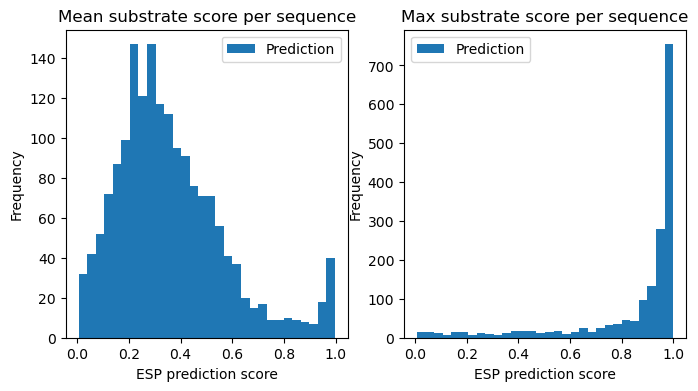

In [83]:
f, (ax, ax2) = plt.subplots(figsize=(8,4), ncols=2)
avg_pred.plot.hist(bins=30, ax=ax)
ax.set_xlabel("ESP prediction score")
ax.set_title("Mean substrate score per sequence")
max_pred.plot.hist(bins=30, ax=ax2)
ax2.set_xlabel("ESP prediction score")
ax2.set_title("Max substrate score per sequence")

In [77]:
avg_sub_pred = df_ES[['substrate', 'Prediction']].groupby("substrate").mean()
max_sub_pred = df_ES[['substrate', 'Prediction']].groupby("substrate").max()

Text(0.5, 1.0, 'Max sequence score per substrate')

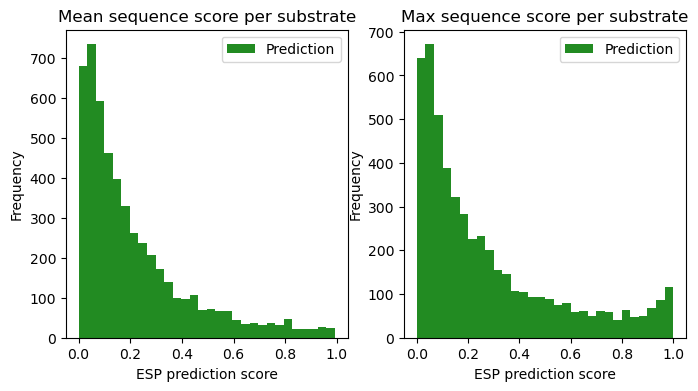

In [85]:
f, (ax, ax2) = plt.subplots(figsize=(8,4), ncols=2)
avg_sub_pred.plot.hist(bins=30, ax=ax, color="forestgreen")
ax.set_xlabel("ESP prediction score")
ax.set_title("Mean sequence score per substrate")
max_sub_pred.plot.hist(bins=30, ax=ax2, color="forestgreen")
ax2.set_xlabel("ESP prediction score")
ax2.set_title("Max sequence score per substrate")